In [16]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode,mean,median
import collections

In [17]:
# Importing the same dataset that we generated in the RFM analysis
data = pd.read_csv("data__mktingstrategy.csv",sep = ",")
data = data.drop(columns = ['Unnamed: 0'])

In [18]:
# check how many observations we have for each year
data.groupby("year_purch").size()

year_purch
2017      320
2018    50301
2019    61021
dtype: int64

# Idea behind the analysis

The marketing analysis will be carried out dividing the data in two years 2018 and 2019 to better detect customer trends and weak spot on which to work on. 

## Monthly activated users

In [19]:
# Creating a dataframe with the observations of year 2018
df_2018 = data.loc[(data["year_purch"] == 2018)]

In [20]:
# Creating a dataframe with the observations of year 2019
df_2019 = data.loc[(data["year_purch"] == 2019)]

In [21]:
# Compute the number of customers that were active daily in the E-commerce for 2018
df_2018["month_year_purch"] = pd.to_datetime(df_2018["month_year_purch"], format = "%m-%Y")
df_mau = pd.concat([df_2018["month_year_purch"], df_2018["customer_unique_id"]], axis = 1)
df_mau.set_index("month_year_purch")
count_mau = df_mau.groupby("month_year_purch").size().to_frame("Customer unique id")

<ipython-input-21-93eb4846295f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018["month_year_purch"] = pd.to_datetime(df_2018["month_year_purch"], format = "%m-%Y")


Text(0.5, 1.0, 'Monthly activated users in 2018')

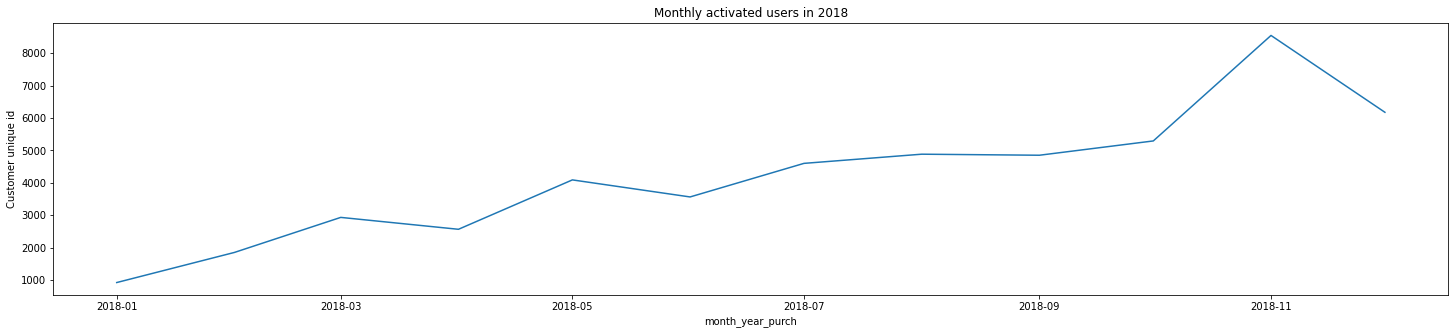

In [22]:
# Plotting the previous data
plt.figure(figsize = (25,5))
sns.lineplot(data = count_mau, x = "month_year_purch", y = "Customer unique id")
plt.title("Monthly activated users in 2018")
#plt.savefig("MAU.png") 

Text(0.5, 1.0, 'Monthly activated users in 2019')

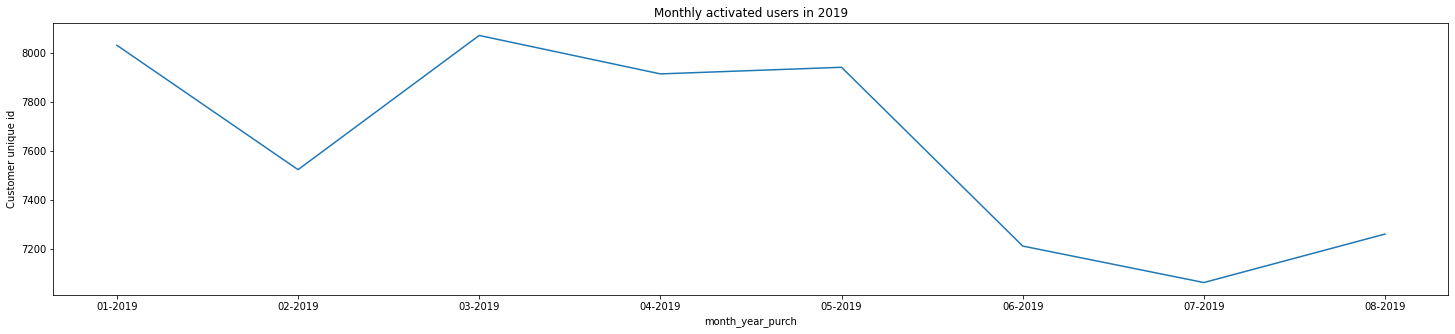

In [23]:
# Repeating the analysis for year 2019
df_mau_new = pd.concat([df_2019["month_year_purch"], df_2019["customer_unique_id"]], axis=1)
df_mau_new.set_index("month_year_purch")
count_mau_new = df_mau_new.groupby("month_year_purch").size().to_frame("Customer unique id")
plt.figure(figsize=(25,5))
sns.lineplot(data=count_mau_new, x="month_year_purch", y="Customer unique id")
plt.title("Monthly activated users in 2019")
#plt.savefig("MAU 2019.png") 

## Daily Spending and Daily Spending per Visitor (RPV)

In [24]:
# Changing object into datetime and Dropping duplicates for 2018
df_2018["hour_purch"] = pd.to_datetime(df_2018["hour_purch"], format = "%Y-%m-%d")
df_2018 = df_2018.drop_duplicates()

<ipython-input-24-4a8b3ca15bb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018["hour_purch"] = pd.to_datetime(df_2018["hour_purch"], format = "%Y-%m-%d")


In [25]:
# Daily spending for each unique user in 2018
revenues_day = df_2018.groupby(["hour_purch", "customer_unique_id"], as_index=False)["price"].sum()


In [26]:
# Computing the number of visitor per day in 2018
n_visitor_day = revenues_day.groupby("hour_purch").hour_purch.value_counts().to_frame()
n_visitor_day = n_visitor_day.rename(columns = {'hour_purch': "visitor/day"})
n_visitor_day = n_visitor_day.reset_index(level = 1, drop = True)


In [27]:
# Computing the daily spending per user each day in 2018
revenues_day = revenues_day.set_index("hour_purch")
revenues_day_new = pd.merge(revenues_day, n_visitor_day, left_index=True, right_index=True)
revenues_day_new["rpv"] = revenues_day_new["price"]/ revenues_day_new["visitor/day"]

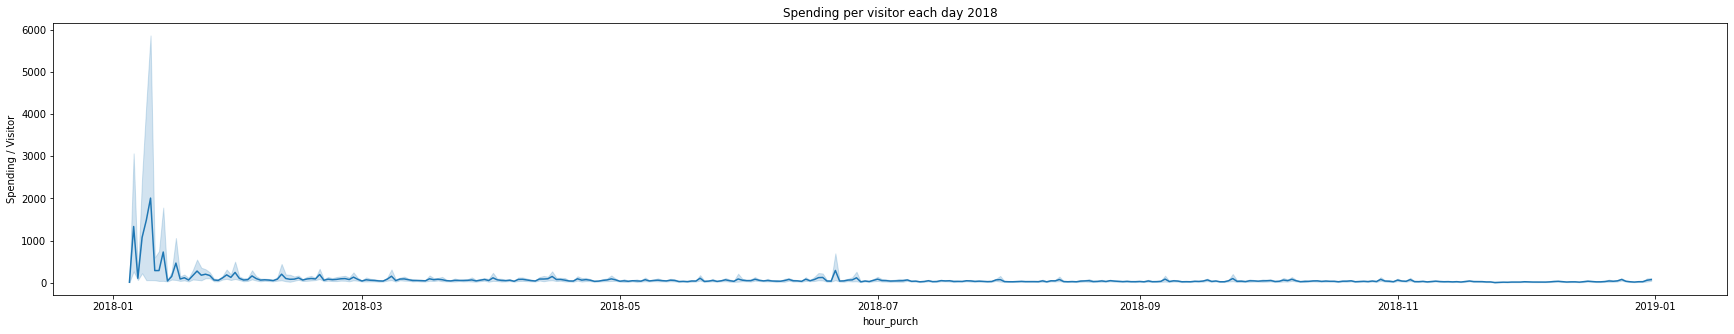

In [28]:
# Plotting the results for 2018
plt.figure(figsize = (30,5))
plt.ylabel('Spending / Visitor')
plt.title("Spending per visitor each day 2018")
sns.lineplot(data=revenues_day_new, x = 'hour_purch', y = 'rpv')
plt.savefig("Spending per visitor 2018.png") 

In [29]:
# Changing object into datetime and Dropping duplicates for 2019
df_2019["hour_purch"] = pd.to_datetime(df_2019["hour_purch"], format = "%Y-%m-%d")


<ipython-input-29-e386032aca54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["hour_purch"] = pd.to_datetime(df_2019["hour_purch"], format = "%Y-%m-%d")


In [30]:
# Daily spending for each unique user in 2019
revenues_day_19 = df_2019.groupby(["hour_purch", "customer_unique_id"], as_index = False)["price"].sum()

In [31]:
# Computing the number of visitor per day in 2019
n_visitor_day_19 = revenues_day_19.groupby("hour_purch").hour_purch.value_counts().to_frame()
n_visitor_day_19 = n_visitor_day_19.rename(columns = {'hour_purch': "visitor/day"})
n_visitor_day_19 = n_visitor_day_19.reset_index(level = 1, drop = True)


In [32]:
# Computing the daily spending per user each day in 2019
revenues_day_19 = revenues_day_19.set_index("hour_purch")
revenues_day_new19 = pd.merge(revenues_day_19, n_visitor_day_19, left_index=True, right_index=True)
revenues_day_new19["rpv"] = revenues_day_new19["price"]/ revenues_day_new19["visitor/day"]

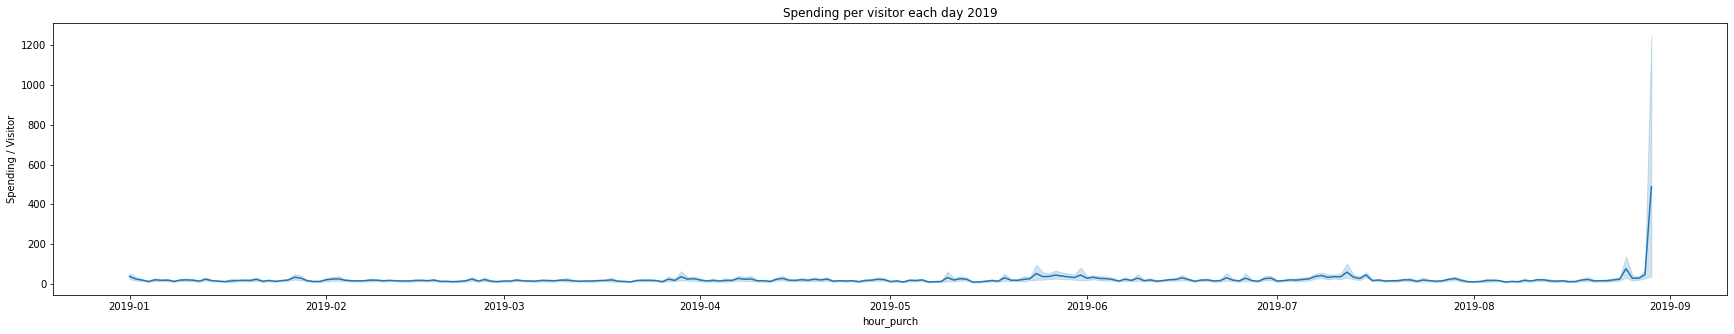

In [33]:
# Plotting the results for 2019
plt.figure(figsize = (30,5))
plt.ylabel('Spending / Visitor')
plt.title("Spending per visitor each day 2019")
sns.lineplot(data = revenues_day_new19, x = 'hour_purch', y = 'rpv')
plt.savefig("Spending per visitor 2019.png") 

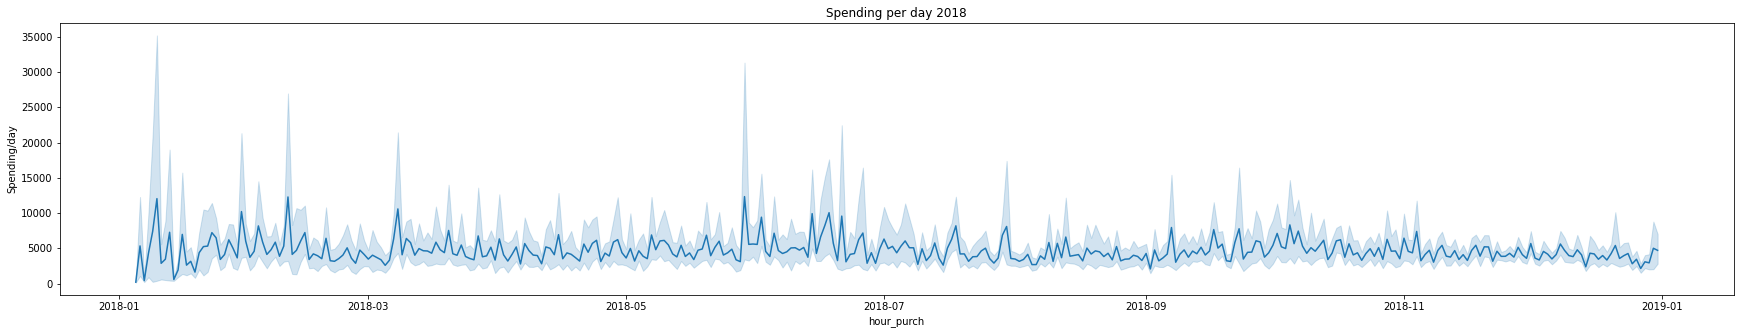

In [34]:
# Revenues per day 2018
plt.figure(figsize = (30,5))
plt.ylabel('Spending/day')
plt.title("Spending per day 2018")
sns.lineplot(data = revenues_day_new, x = 'hour_purch', y = 'price')
plt.savefig("Spending per day 2018.png") 

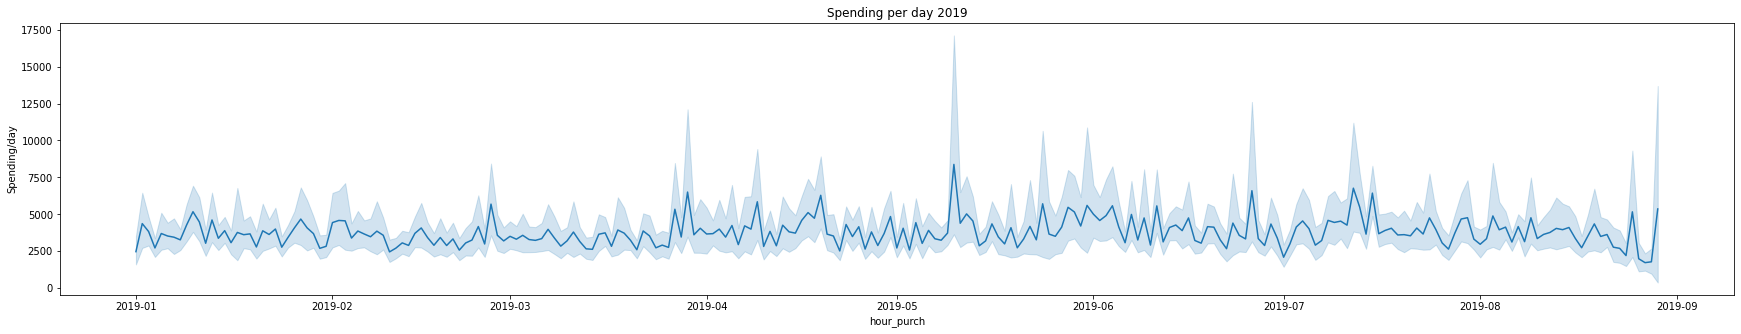

In [35]:
# Revenues per day 2019
plt.figure(figsize = (30,5))
plt.ylabel('Spending/day')
plt.title("Spending per day 2019")
sns.lineplot(data = revenues_day_new19, x = 'hour_purch', y = 'price')
plt.savefig("Spending per day 2019.png") 

## Purchase Trend

In [36]:
# Purchase Trend in 2018
trend = df_2018.groupby(["hour_purch","order_id"], as_index = False)["order_id"].size()
trend = trend.groupby("hour_purch").hour_purch.value_counts().to_frame("Order per day")
trend = trend.reset_index(level = 1, drop = True)

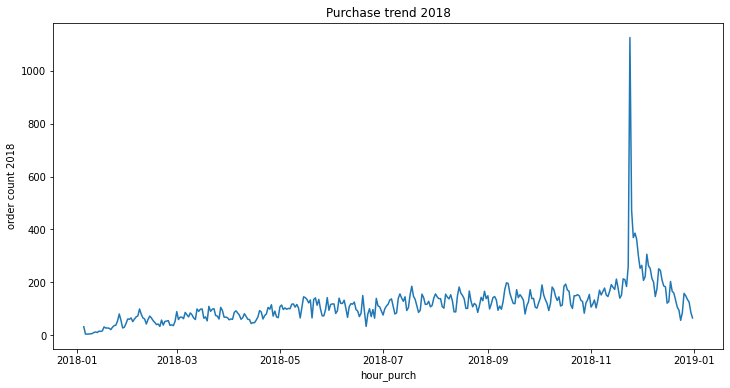

In [37]:
# Plotting the purchase trend 2018
plt.figure(figsize = (12,6))
plt.ylabel('order count 2018')
plt.title("Purchase trend 2018")
sns.lineplot(data = trend,x = 'hour_purch',y = 'Order per day')
plt.savefig("Purchase trend 2018.png") 

In [38]:
# Purchase Trend in 2019
trend19 = df_2019.groupby(["hour_purch","order_id"], as_index = False)["order_id"].size()
#df_2018.groupby(["hour_purch"]).order_id.value_counts().to_frame()
trend19 = trend19.groupby("hour_purch").hour_purch.value_counts().to_frame("Order per day")
trend19 = trend19.reset_index(level = 1, drop = True)

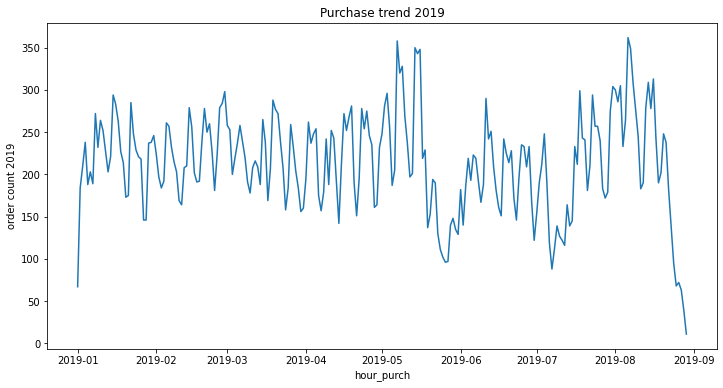

In [39]:
# Plotting the purchase trend 2019
plt.figure(figsize = (12,6))
plt.ylabel('order count 2019')
plt.title("Purchase trend 2019")
sns.lineplot(data = trend19,x = 'hour_purch',y = 'Order per day')
plt.savefig("Purchase trend 2019.png") 

## Best Sellers

In [40]:
# Best sellers in 2018 (printed only the first 15)
best_sellers = df_2018.groupby(["seller_id", 'product_category_name']).price.sum().to_frame()
best_sellers = best_sellers.sort_values("price", ascending= False)
best_sellers[1:15]

,,price
seller_id,product_category_name,
7a67c85e85bb2ce8582c35f2203ad736,comics,10128702
7c67e1448b00f6e969d365cea6b010ab,office products,8966022
46dc3b2cc0980fb8ec44634e21d2718e,toys games,6676201
cc419e0650a3c5ba77189a1882b7556a,beauty & personal care,4216996
53243585a1d6dc2643021fd1853d8905,computers tablets,3097865
cc419e0650a3c5ba77189a1882b7556a,fragrance,3048303
a1043bafd471dff536d0c462352beb48,lawn garden,2374768
25c5c91f63607446a97b143d2d535d31,computer accessories,2120319
5c243662ce92d84573bfaff24c3e3700,beauty & personal care,2119124


In [41]:
##best sellers in 2019 (printed only the first 15)
best_sellers = df_2019.groupby(["seller_id", 'product_category_name']).price.sum().to_frame()
best_sellers = best_sellers.sort_values("price", ascending= False)
best_sellers[1:15]

,,price
seller_id,product_category_name,
edb1ef5e36e0c8cd84eb3c9b003e486d,beauty & personal care,5998020
7a67c85e85bb2ce8582c35f2203ad736,comics,3780097
06a2c3af7b3aee5d69171b0e14f0ee87,beauty & personal care,3578401
c70c1b0d8ca86052f45a432a38b73958,beauty & personal care,3312711
ea8482cd71df3c1969d7b9473ff13abc,cell phones,2545841
cc419e0650a3c5ba77189a1882b7556a,beauty & personal care,2027494
900ba814c251a692506d7834c1218441,beauty & personal care,1813187
ceaec5548eefc6e23e6607c5435102e7,comics,1697453
7d13fca15225358621be4086e1eb0964,jewelry,1490911


## Best Customers

In [42]:
# Best customers 2018 (printed only the first 15)
best_customers = df_2018.groupby(["customer_unique_id", 'product_category_name']).price.sum().to_frame()
best_customers = best_customers.sort_values("price", ascending = False)
best_customers[1:15]

,,price
customer_unique_id,product_category_name,
182ebbe49711dd49de4fbbdf4a999c10,sport outdoors,493191
5d09b0d82126457e2a8ebfb9c9a1ffc4,computer accessories,369999
262f884f74980c0ad26fcaab579a3294,computers tablets,309998
6fbc7cdadbb522125f4b27ae9dee4060,office products,303962
895617ab63a9ad8881d9470f7427cd25,computers tablets,299999
c6111f70f40b3420e387493c627c27fa,computers tablets,299999
ea984b06b18cc6905bc2f9b0a3d1c986,computer accessories,299989
6172bd5b7f52ade8c6c4548b448ff54f,computer accessories,299989
2ae8173a688e326821403a5b7a6858c2,computer accessories,299989


In [43]:
# Best customers 2019 (printed only the first 15)
best_customers = df_2019.groupby(["customer_unique_id", 'product_category_name']).price.sum().to_frame()
best_customers = best_customers.sort_values("price", ascending = False)
best_customers[1:15]

,,price
customer_unique_id,product_category_name,
301d1ce5a76b7e1bc47e5115bf5eb6ba,monitors,601986
edde2314c6c30e864a128ac95d6b2112,music instruments,439987
fa562ef24d41361e476e748681810e1e,videogame console,409999
2c3b08cf3584d8c0a81d9618a73aa219,computers tablets,339999
46450c74a0d8c5ca9395da1daac6c120,comics,310999
ef8d54b3797ea4db1d63f0ced6a906e9,coffee machines,284990
0cfb94f148a3f7b02123e6f64e6674f6,sport outdoors,279998
c38b132f1c68c14c0d3b32e66b796eba,beauty & personal care,279965
262305e901587b79c5236175b06efb78,tools home improvement,275994


## Spending by state

Text(0.5, 1.0, 'Spending by autonomous community 2018')

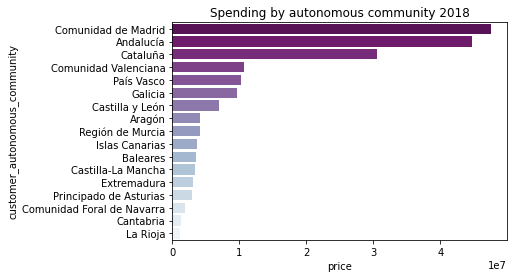

In [44]:
# Customer spending by autonomous communities in 2018
rev_by_state2018 = df_2018.groupby("customer_autonomous_community").price.sum().sort_values(ascending = False).to_frame()
sns.barplot(data = rev_by_state2018, x = 'price', y = rev_by_state2018.index, palette = "BuPu_r" )
plt.title("Spending by autonomous community 2018")
#plt.savefig("Spending by autonomous community 2018.png")

Text(0.5, 1.0, 'Spending by autonomous community 2019')

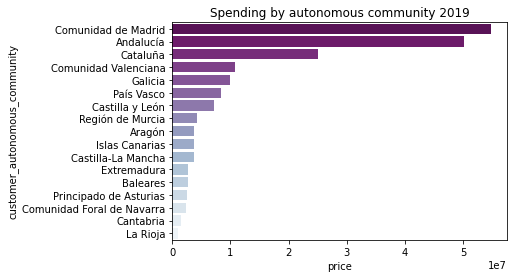

In [45]:
# Customer spending by autonomous communities in 2019
rev_by_state2019 = df_2019.groupby("customer_autonomous_community").price.sum().sort_values(ascending = False).to_frame()
sns.barplot(data = rev_by_state2019, x = 'price', y = rev_by_state2019.index, palette= "BuPu_r" )
plt.title("Spending by autonomous community 2019")
#plt.savefig("Spending by autonomous community 2019.png")